In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import numpy as np
import glob
mpl.style.use('seaborn-talk')
import ROOT

Welcome to JupyROOT 6.22/02


In [2]:
%%cpp -d

#include "sPhenixStyle.C"
#include <TStyle.h>

In [3]:

%%cpp

SetsPhenixStyle();
gStyle->SetOptStat(0);
gStyle->SetOptFit(1111);
TVirtualFitter::SetDefaultFitter("Minuit2");

gSystem->Load("libg4eval.so");

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [4]:
# eval = ROOT.TFile.Open("/gpfs/mnt/gpfs02/eic/DATA/ECCE_Productions/MC/prop.2/419662c/General/particleGun/singlePion/eval_00000/DST_General_particleGun_singlePion_000_4995000_01000_g4tracking_eval.root")
# tracks = eval.tracks
# eval.ls()

In [5]:
tracks = ROOT.TChain('tracks','tracks')
tracks.Add("/gpfs/mnt/gpfs02/eic/DATA/ECCE_Productions/MC/prop.2/419662c/General/particleGun/singlePion/eval_00000/DST_General_particleGun_singlePion_000_499*_g4tracking_eval.root")

10

In [6]:

tracks.Show(0)

======> EVENT:0
 event           = 1
 gtrackID        = 1
 gflavor         = 211
 gpx             = 0.187818
 gpy             = -1.13531
 gpz             = 10.0407
 gvx             = 0
 gvy             = 0
 gvz             = -3.89565
 gvt             = 0
 trackID         = 0
 charge          = 1
 nhits           = 0
 px              = 0.189729
 py              = -1.1544
 pz              = 10.2017
 pcax            = 0.00367932
 pcay            = 0.00977152
 pcaz            = -3.95826
 dca2d           = -0.0037214
 nHit_G4HIT_BARR = 0
 nHit_G4HIT_CTTL_0 = 0
 nHit_G4HIT_EFST_0 = 0
 nHit_G4HIT_EFST_1 = 0
 nHit_G4HIT_EFST_2 = 0
 nHit_G4HIT_EFST_3 = 0
 nHit_G4HIT_EFST_4 = 0
 nHit_G4HIT_EGEM_0 = 0
 nHit_G4HIT_ETTL_0 = 0
 nHit_G4HIT_ETTL_1 = 0
 nHit_G4HIT_FGEM_0 = 1
 nHit_G4HIT_FST_0 = 1
 nHit_G4HIT_FST_1 = 1
 nHit_G4HIT_FST_2 = 1
 nHit_G4HIT_FST_3 = 1
 nHit_G4HIT_FST_4 = 1
 nHit_G4HIT_FTTL_0 = 1
 nHit_G4HIT_FTTL_1 = 1
 nHit_G4HIT_RWELL_0 = 0
 nHit_G4HIT_SVTX = 0


In [7]:
tracks.SetAlias('pt','1*sqrt(px*px + py*py)')
tracks.SetAlias('gpt','1*sqrt(gpx*gpx + gpy*gpy)')

tracks.SetAlias('ptot','1*sqrt(px*px + py*py + pz*pz)')
tracks.SetAlias('gptot','1*sqrt(gpx*gpx + gpy*gpy + gpz*gpz)')

tracks.SetAlias('eta','0.5*log((ptot + pz)/(ptot - pz))')
tracks.SetAlias('geta','0.5*log((gptot + gpz)/(gptot - gpz))')

True

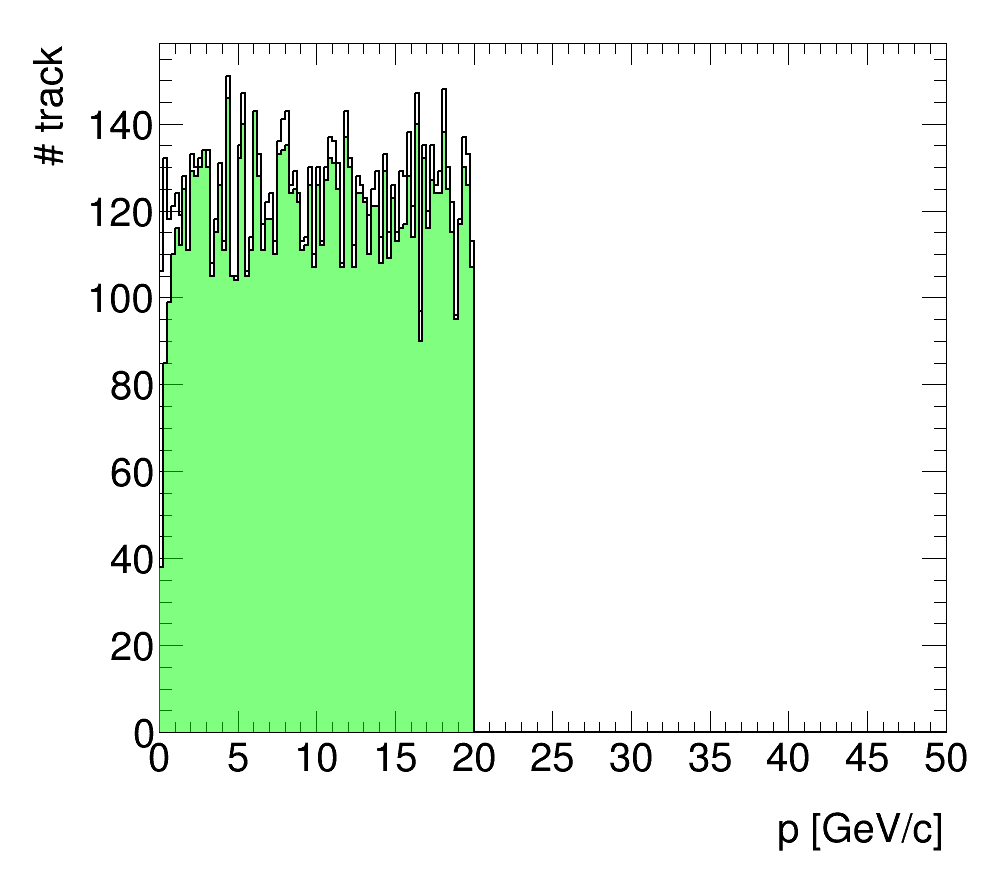

In [8]:
c1 = ROOT.TCanvas( 'p', 'p', 1000, 900)

hgptot = ROOT.TH1F('hgptot', ';p [GeV/c];# track', 200, 0, 50);
tracks.Draw('gptot>>hgptot');
hptot = ROOT.TH1F('hptot', ';p [GeV/c];# track', 200, 0, 50);
tracks.Draw('gptot>>hptot','ptot>0','same');
hptot.SetFillColorAlpha(ROOT.kGreen,.5);

c1.Draw()

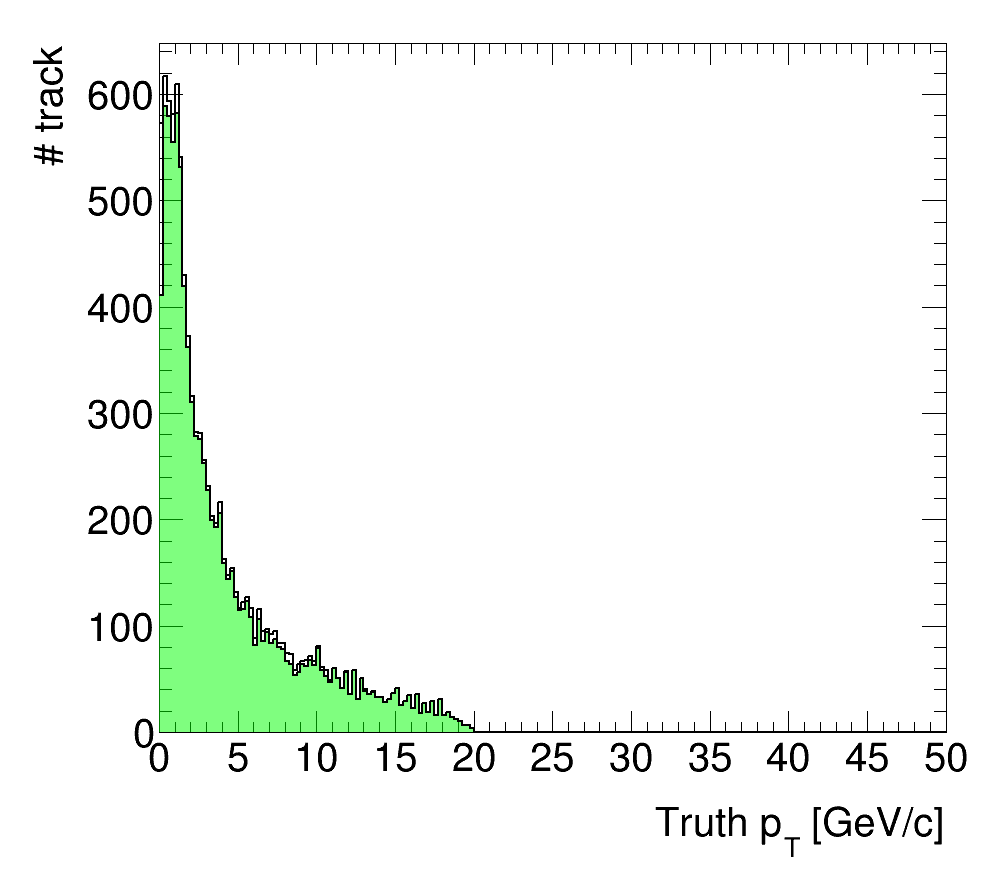

In [9]:
c1 = ROOT.TCanvas( 'pt', 'pt', 1000, 900)

hgpt = ROOT.TH1F('hgpt', ';Truth p_{T} [GeV/c];# track', 200, 0, 50);
tracks.Draw('gpt>>hgpt');
hpt = ROOT.TH1F('hpt', ';Truth p_{T} [GeV/c];# track', 200, 0, 50);
tracks.Draw('gpt>>hpt','pt>0','same');
hpt.SetFillColorAlpha(ROOT.kGreen,.5);

c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: pt
Warning in <TROOT::Append>: Replacing existing TH1: hgpt (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hpt (Potential memory leak).


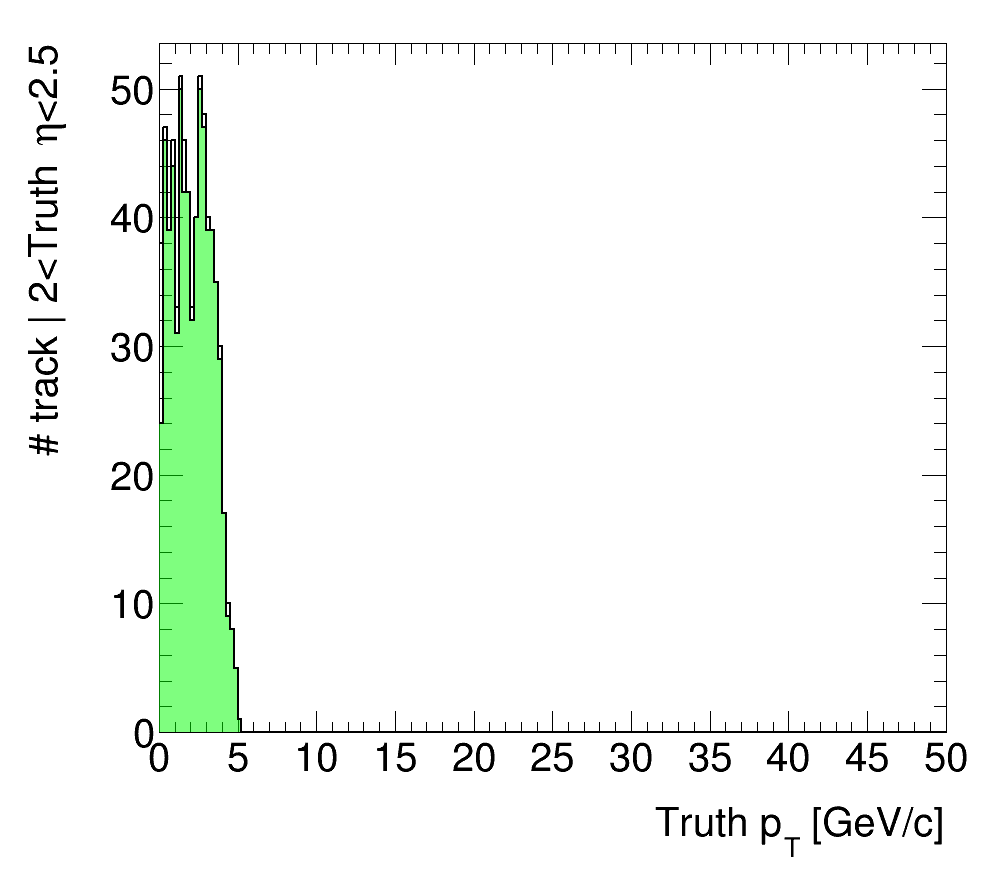

In [10]:
c1 = ROOT.TCanvas( 'pt', 'pt', 1000, 900)

hgpt = ROOT.TH1F('hgpt', ';Truth p_{T} [GeV/c];# track | 2<Truth #eta<2.5', 200, 0, 50);
tracks.Draw('gpt>>hgpt','geta>2 && geta<2.5');
hpt = ROOT.TH1F('hpt', ';Truth p_{T} [GeV/c];# track', 200, 0, 50);
tracks.Draw('gpt>>hpt','pt>0 && geta>2 && geta<2.5','same');
hpt.SetFillColorAlpha(ROOT.kGreen,.5);

c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: pt
Warning in <TROOT::Append>: Replacing existing TH1: hgpt (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hpt (Potential memory leak).


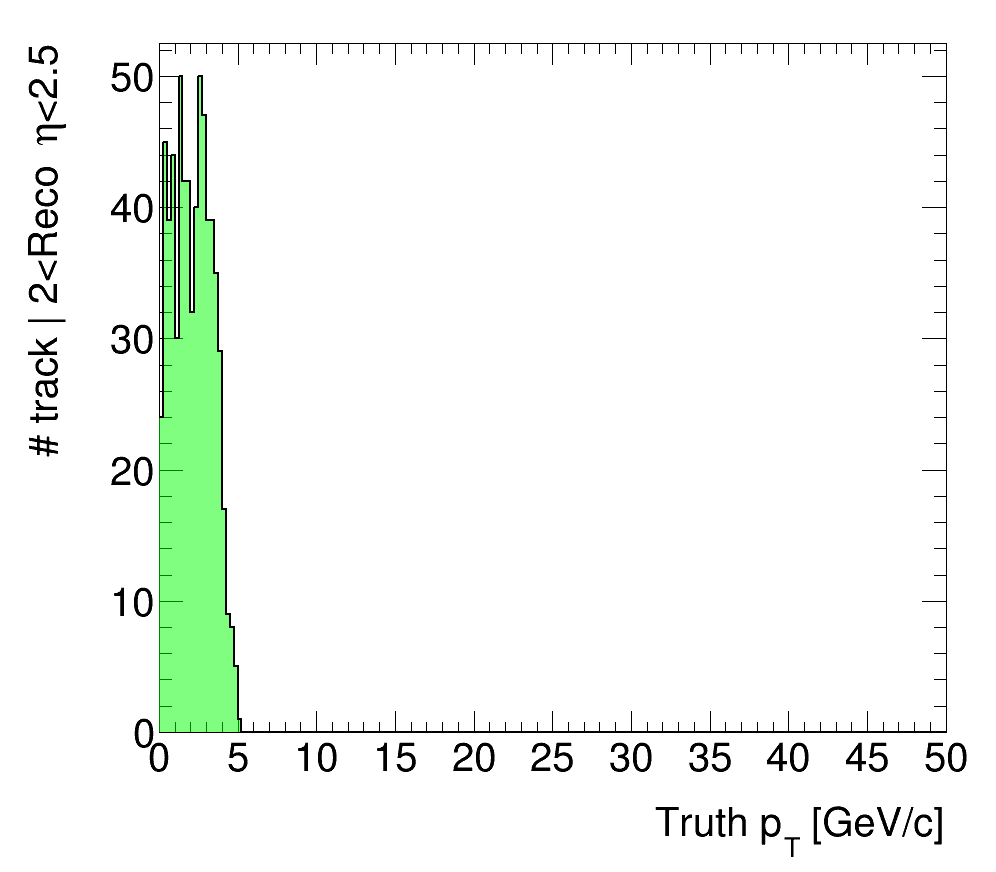

In [11]:
c1 = ROOT.TCanvas( 'pt', 'pt', 1000, 900)

hgpt = ROOT.TH1F('hgpt', ';Truth p_{T} [GeV/c];# track | 2<Reco #eta<2.5', 200, 0, 50);
tracks.Draw('gpt>>hgpt','eta>2 && eta<2.5');
hpt = ROOT.TH1F('hpt', ';Truth p_{T} [GeV/c];# track', 200, 0, 50);
tracks.Draw('gpt>>hpt','pt>0 && eta>2 && eta<2.5','same');
hpt.SetFillColorAlpha(ROOT.kGreen,.5);

c1.Draw()